In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/matches.csv
/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv


In [2]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
runs=data.groupby('batter').sum()['batsman_runs']
runs

batter
A Ashish Reddy     280
A Badoni           399
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yashpal Singh       47
Younis Khan          3
Yudhvir Singh        1
Yuvraj Singh      2754
Z Khan             117
Name: batsman_runs, Length: 637, dtype: int64

In [5]:
runs=runs.values
print(runs)


[ 280  399    4   53   25    4   62   35  222  381   34   19   41   45
    2  974    4    4   15   69   12  217    9  179   42   26  123 5181
  120 2069   20  181  148   79  724   90 2266   23   10   49 2092   16
    3   91  775  401  672 4400   36    7   34   87  339   12 1418   27
   26  194   23   49   32 4348   22   39    1  397    0  893   33   17
  115   63   87    7  134  220   36   13   18   25  186   31  388   76
  280   21  283    5  124  507    5   35    6  935    3 2882  125   10
  238    1   18 1400  193   23   40   32  187  452   15  177    0   20
  303  205 1329  390 4997  618  538   98   81    8   16    8  971  169
  181   78    4   25  161    3 1521   44   33  148   10 2714 6399   12
  304  375   21    0  170 1560  111 1321 1322   92   26   33    1   39
   53  295  115   80  121    6   11  924    4    1 1808   19   44   13
 2385  104   18  460   13  167  152  654 1406   24   14 4133   14    4
  183    3 4217   22  739    3    4   65  284    2  663 2720   15  511
    2 

/tmp/ipykernel_18/1329827010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(runs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

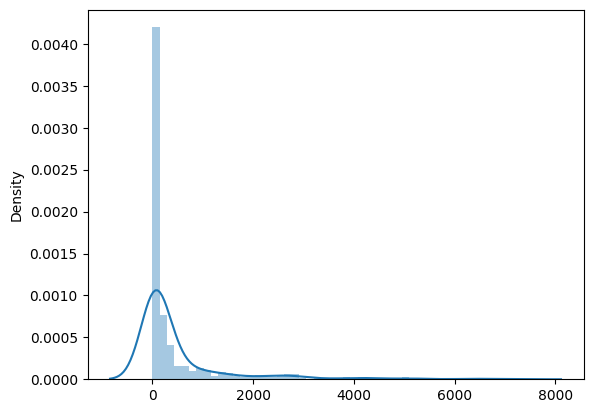

In [6]:
sns.distplot(runs)

In [7]:
n = 50
m =1000

new=[]

for i in range(m):
    x=np.random.choice(runs, size =n)
    new.append(x.mean())

In [8]:
len(new)

1000

In [9]:
new=np.array(new)
new

array([ 537.94,  520.5 ,  609.38,  627.44,  447.62,  760.84,  274.48,
        558.72,  497.12,  301.96,  517.54,  514.54,  370.68,  604.22,
        462.24,  420.44,  217.04,  684.54,  831.78,  343.54,  401.66,
        352.52,  496.4 ,  611.48,  455.22,  461.44,  715.64,  755.38,
        494.7 ,  470.1 ,  288.14,  334.24,  280.12,  296.44,  453.12,
        571.6 ,  743.5 ,  294.4 ,  519.8 ,  783.96,  429.36,  385.04,
        970.96,  517.26,  791.82,  538.24,  446.18,  373.68,  521.94,
        421.58,  409.42,  490.68,  434.72,  713.44,  551.62,  621.34,
        640.78,  554.88,  567.32,  414.94,  335.84,  232.66,  480.46,
        409.76,  594.6 ,  288.56,  688.2 ,  322.18,  486.06,  762.52,
        688.86,  325.18,  664.74,  264.36,  652.96,  570.22,  622.44,
        528.96,  434.78,  525.54,  312.32,  637.88,  489.78,  482.94,
        336.6 ,  469.44,  638.06,  434.14,  356.54,  159.62,  254.06,
        542.56,  419.34,  351.16,  448.18,  452.9 ,  403.38,  388.2 ,
        524.92,  655

/tmp/ipykernel_18/397519180.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

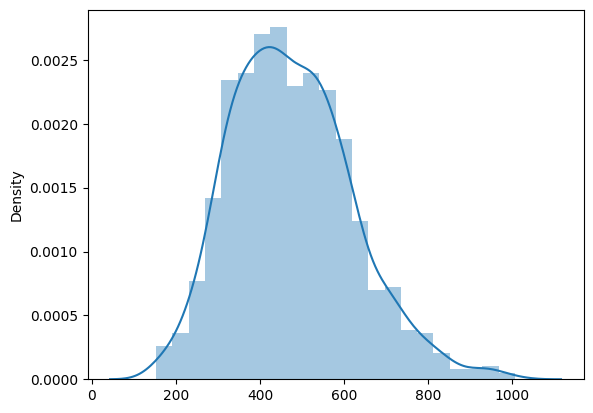

In [10]:
sns.distplot(new)

In [11]:
runs.mean()

479.4458398744113

In [12]:
new.mean()

475.49012

In [13]:
runs.std()/7.2

140.84240038840085

In [14]:
new.std()

144.69594146065606